<a href="https://colab.research.google.com/github/OsmarVar/Unidad-1-Simulacion/blob/main/Experimento_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experimento de Buffon

El problema de la aguja de Buffon es una cuestión planteada por primera vez en el siglo XVIII por Georges-Louis Leclerc, Conde de Buffon, y relaciona de una manera sorprendente la teoría de probabilidades con el número π.

En 1777, Buffon propone este problema:

"Supongo que en una habitación en la que el suelo está simplemente dividido por juntas paralelas uno lanza un palo al aire, y que uno de los jugadores apuesta a que el palo no cruzará paralelas en el suelo, y que el otro, por el contrario, apuesta a que el palo cruzará alguna de estas paralelas; se pregunta por las probabilidades de estos dos jugadores. Se puede jugar a este juego en un tablero de damas con una aguja de coser o un alfiler sin cabeza."

Ahora, ¿como se puede ver analiticamente este problema?

#Solución analitica:

Comenzamos por definir el parametro de tamaño $x$ , por:
$$ x = \frac{l}{d}$$

Para una aguja corta (es decir, una más corta que la distancia entre dos líneas de modo que $x =\frac{l}{d} < 1$) para la probabilidad $P(x)$ de que la aguja caiga sobre una linea es:

$$\int_{0}^{2\pi} \frac{l|cos\theta|}{d} \cdot \frac{d\theta}{2\pi}$$


$$ = \frac{2l}{\pi d} \int_{0}^{\frac{\pi}{2}} cos\theta d\theta$$


$$ = \frac{2 l}{\pi d}$$


$$ = \frac{2 x}{\pi}$$

Para $x = \frac{l}{d} = 1$, esto por lo tanto se convierte en:

$$P(x = 1)  = \frac{2}{\pi} = 0.636619...$$

Ahora, para una aguja mas grande,( uno más largo que la distancia entre dos líneas para para que x = \frac{l}{d} > 1), la probabilida de que cruce al menos una línea es la expresión un poco más complicada.

$$P(X) = \frac{2}{\pi}(x - \sqrt{x^2 - 1 + sec^{-1}x}$$

donde:


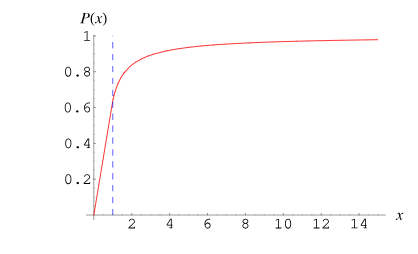


Escribiendo:

$$ P(x) =  \begin{cases}
\frac{2x}{\pi} & \text{si} x \leq 1 \\
\frac{2}{\pi}(x - \sqrt{x^2 - 1 + sec^{-1} x} & \text{si}  x \geq 1
\end {cases}
$$

Luego de la grafica trazada, lo anterior se puede deducir observando que

$$P(x) = \int_{0}^{\frac{\phi}{2}} \int_{t sin \frac{\phi}{2}} f_{s} f_{\phi} ds d\phi$$

donde:

$$ f_{s} = \begin{cases}
\frac{2}{d} & \text{si} 0 \leq x \leq \frac{1}{2}d \\
0 & \text{si}  x \geq \frac{1}{2}d
\end {cases}
$$

$$ f_{\phi} = \frac{2}{\pi}$$

Son las funciones de probabilidad para la distancia $s$ del punto medio de la aguja $s$ a la línea más cercana y el ángulo $\phi$ formado por la aguja y las líneas, la intersección se produce cuando $0 \leq s \leq \frac{(l sin \phi)}{2}$,y $\phi$ puede ser restringida a $(0 , \frac{\phi}{2}$por simetria

Sea $N$ el numero de cruces de línea mediante $n$ lanzamientos de una aguja corta con parámetro de tamaño $x$. Entonces $N$ tiene una distribución binomial con parametros $n$ y $\frac{2x}{\pi}$. Un punto estimado para $\theta = \frac{1}{\pi}$ esta dado por:

$$\hat{\theta} = \frac{N}{2 x n}$$

que es a la vez un estimador insesgado de varianza mínima uniforme y un estimador de  máxima verosimilitud con varianza:

$$ var(\hat{\theta}) = \frac{\theta}{2n} (\frac{1}{x} - 2 \theta)$$

que, en el caso $x = 1$ de:

$$var(\hat{\pi}) = \frac{\theta^2(1 - 2\theta)}{2\theta n}$$

El estimador $\hat{\pi} = \frac{1}{\hat{\theta}}$ para $\pi$ se conoce como estimador de Buffon y es un estimador asintóticamente insesgado dado por

$$ \hat{\pi} = \frac{2 x n}{N}$$

donde $ x = \frac{l}{d}$,$n$ es el número de lanzamientos, y $N$ es el numero de cruces de línea. Tiene varianza asintótica

$$avar(\hat{\pi}) = \frac{\pi^2}{2n} (\frac{\pi}{x} - 2 )$$

que, para el caso $x = 1$, se convierte en:

$$avar(\hat{\pi}) = \frac{\pi^2 (\frac{1}{2}\pi - 1)}{n}$$

$$ = \frac{5.6335339}{n}$$

#Solucion por Simulacion

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [26]:
longitud_aguja = 1.0
ancho_tablero = 2.0
numero_lanzamientos = 500

In [36]:
intersecciones = 0
angulos = []
varianzas = []

In [37]:
for _ in range(numero_lanzamientos):
  x = random.uniform(0, ancho_tablero)
  y = random.uniform(0, ancho_tablero)

  angulo = random.uniform(0, 2 * np.pi)

  orientacion = angulo - np.pi / 2

  if abs(x * np.sin(orientacion) + y * np.cos(orientacion)) <= longitud_aguja / 2:
    intersecciones += 1
    angulos.append(angulo)

    distancia = abs(y - (ancho_tablero / 2) * np.tan(orientacion))

    varianzas.append(distancia ** 2)

pi_estimado =  2 * longitud_aguja * numero_lanzamientos / (ancho_tablero * intersecciones)

In [38]:
print(f"Numero de lanzamientos: {numero_lanzamientos}")
print(f"intersecciones: {intersecciones}")
print(f"Estimacion de pi : {pi_estimado}")

Numero de lanzamientos: 500
intersecciones: 134
Estimacion de pi : 3.7313432835820897


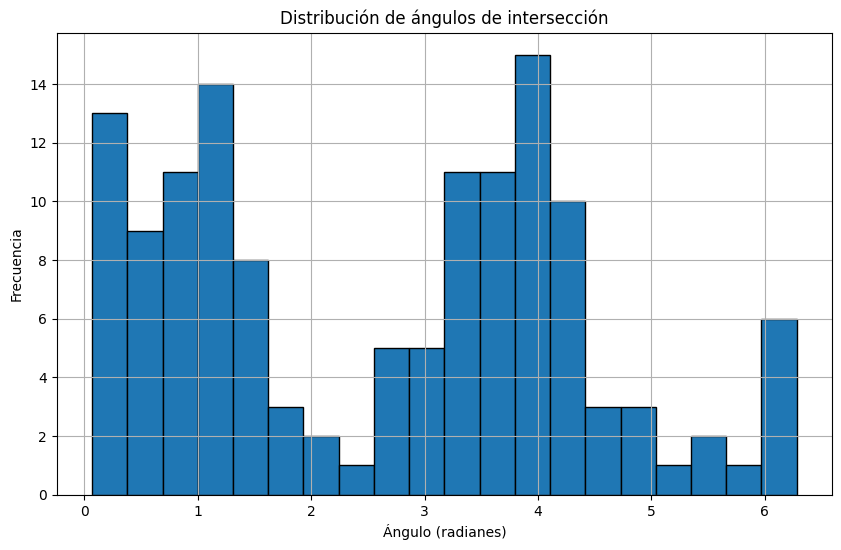

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(angulos, bins=20, edgecolor='black')
plt.xlabel('Ángulo (radianes)')
plt.ylabel('Frecuencia')
plt.title('Distribución de ángulos de intersección')
plt.grid(True)
plt.show()

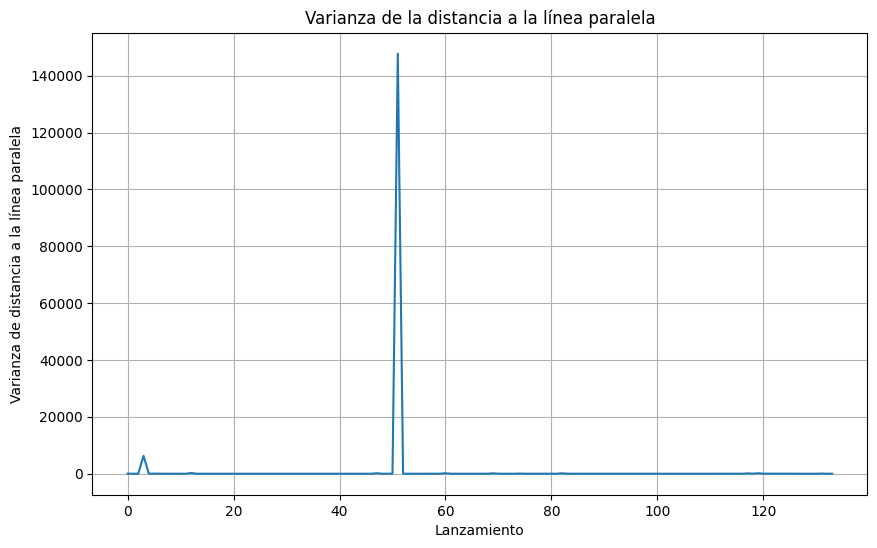

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(varianzas)
plt.xlabel('Lanzamiento')
plt.ylabel('Varianza de distancia a la línea paralela')
plt.title('Varianza de la distancia a la línea paralela')
plt.grid(True)
plt.show()